In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

In [ ]:
#pC - Covid pośród populacji
#pL - Brak węchu pośród populacji
#pLC - Brak węchu pośród chorych na Covid
#pCL - Chorzy na Covid pośród osób z brakiem węchu

In [28]:
class ReasonBackwards:
    
    def __init__(self, pC, pL, pLC):
        self.pC = pC 
        self.pL = pL
        self.pLC = pLC
        
    def reason(self):
        return float((self.pLC * self.pC) / self.pL)


In [29]:
test = ReasonBackwards(pC = 0.0062, pL = 0.01, pLC = 0.9)

print(test.reason())

0.5579999999999999


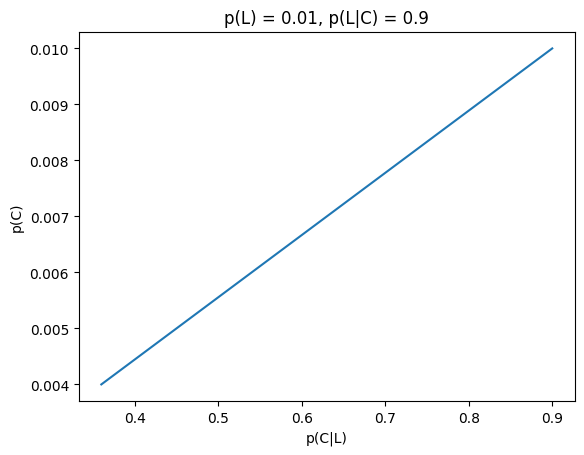

In [61]:
#pC - Covid pośród populacji
#pL - Brak węchu pośród populacji
#pLC - Brak węchu pośród chorych na Covid
#pCL - Chorzy na Covid pośród osób z brakiem węchu
pC_values = [0.004, 0.005, 0.0062, 0.008, 0.01]
pCL_values = []
for pC_value in pC_values:
    pCL = ReasonBackwards(pC = pC_value, pL = 0.01, pLC = 0.9).reason()
    pCL_values.append(pCL)

plt.title('p(L) = 0.01, p(L|C) = 0.9')
plt.plot(pCL_values, pC_values)
plt.xlabel('p(C|L)')
plt.ylabel('p(C)')
plt.show()

#Im większa część populacji ma Covid tym bardziej prawdopodobne 
#jest to, że osoba cierpiąca na brak węchu ma Covid

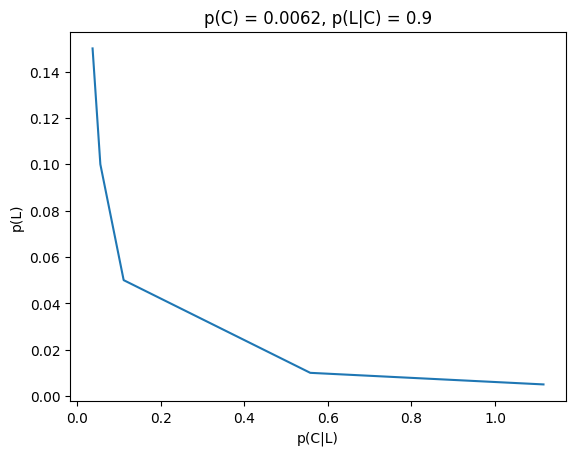

In [56]:
#pC - Covid pośród populacji
#pL - Brak węchu pośród populacji
#pLC - Brak węchu pośród chorych na Covid
#pCL - Chorzy na Covid pośród osób z brakiem węchu
pL_values = [0.005, 0.01, 0.05, 0.1, 0.15]
pCL_values = []
for pL_value in pL_values:
    pCL = ReasonBackwards(pC = 0.0062, pL = pL_value, pLC = 0.9).reason()
    pCL_values.append(pCL)

plt.title('p(C) = 0.0062, p(L|C) = 0.9')
plt.plot(pCL_values, pL_values)
plt.xlabel('p(C|L)')
plt.ylabel('p(L)')
plt.show()

#Im bardziej prawdopodobne jest występowanie braku węchu w populacji tym mniej prawdopodobne 
#jest to, że osoba cierpiąca na brak węchu ma Covid

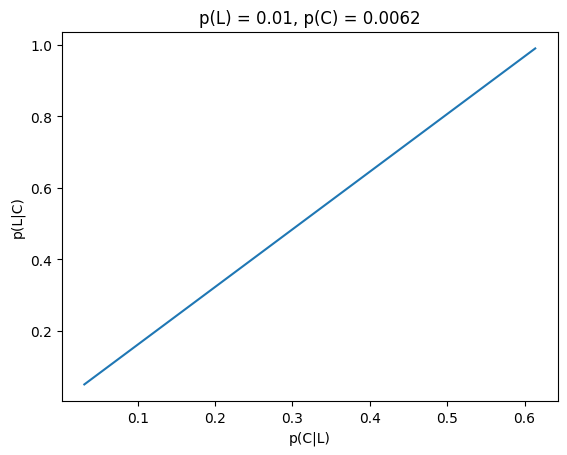

In [59]:
#pC - Covid pośród populacji
#pL - Brak węchu pośród populacji
#pLC - Brak węchu pośród chorych na Covid
#pCL - Chorzy na Covid pośród osób z brakiem węchu
pLC_values = [0.05, 0.2, 0.7, 0.9, 0.95, 0.99]
pCL_values = []
for pLC_value in pLC_values:
    pCL = ReasonBackwards(pC = 0.0062, pL = 0.01, pLC = pLC_value).reason()
    pCL_values.append(pCL)

plt.title('p(L) = 0.01, p(C) = 0.0062')
plt.plot(pCL_values, pLC_values)
plt.xlabel('p(C|L)')
plt.ylabel('p(L|C)')
plt.show()

#Im bardziej prawdopodobne jest występowanie braku węchu u chorych na Covid tym bardziej
#prawdopodobne jest to, że osoba cierpiąca na brak węchu ma Covid

In [21]:
#pC - Covid pośród populacji
#pL - Brak węchu pośród populacji
#pLC - Brak węchu pośród chorych na Covid
#pCL - Chorzy na Covid pośród osób z brakiem węchu

test = ReasonBackwards(pC = 0.2, pL = 0.001, pLC = 0.01)

print(test.reason())

#Taki wynik jest spowodowany podaniem nieprawidłowch danych wejściowych, gdyż prawdopodobieństwo powinno zawierać się
#w przedziale od 0 do 1. Przyczyną jest nieprawidłowa proporcja pomiędzy p(L) a p(L|C). p(L|C) powinno być mniejsze od
#p(L) gdyż liczba osób w całej populacji z pewną dolegliwością (np. brakiem węchu) jest większa niż liczba osób
#cierpiących na tę samą dolegliwość spowodowaną pewną chorobą (np. Covid). Aby rozwiązać ten problem można zmienić
#wartości wejściowe z zachowaniem proporcji, tak aby p(L|C) było mniejsze od p(L).

2.0
